<a href="https://colab.research.google.com/github/Emaankanwal8/Airbnb-NewYork-EDA-Analysis/blob/main/EDA_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Load the dataset and import important libraries

In [1]:
#important libraries for EDA data visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#we are going to load our dataset which is in csv format
df=pd.read_csv('/content/AB_NYC_2019.csv')
#it will show  first five rows from  dataset
df.head()

print("shape",df.shape)


shape (48895, 16)


Step 2:  Gather the Basic Information

In [2]:
#it will give the information of dataset which type of data is stored how many entries are there
df.info()
print('/nstatistical summary')
#it give the summary of numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [3]:
#check missing values
#the sum() function calculates the total number of True values (missing values) for each column.
print("missing values count:\n", df.isnull().sum())


missing values count:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


step 3: now we apply  strategy on missing data

In [4]:
#first strategy
# in these columns delete the rows of missing values
rows_to_drop = ['host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
                  'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
                  'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
# ###df.dropna(): This is a pandas function that removes rows or columns with missing values.
# subset=rows_to_drop: This argument specifies that the dropna() operation should only consider the columns listed in the rows_to_drop list when looking for missing values. If a row has a missing value in any of these columns, that row will be dropped.
# inplace=True: This argument modifies the DataFrame df directly.###
df.dropna(subset=rows_to_drop, inplace=True)
print("Shape after dropping rows:", df.shape)

Shape after dropping rows: (48874, 16)


step 4: final check whether the missing values handled or not

In [5]:
# Check karo sab missing values handle ho gaye hain
print("Final Missing Values Count:")
print(df.isnull().sum().sum())  # Yeh 0 aana chahiye

Final Missing Values Count:
20110


step 5:we have seen that still 9668 values are null because  'name', 'last_review' and 'reviews_per_month' these columns have high null values each has more than 4000 if we drop we can loss important data so we fil that null values

In [6]:
#  Fill values
#df_filled = df.copy(): This line creates a shallow copy of the DataFrame df and assigns it to a new variable called df_filled. This is important because it allows you to modify df_filled (like filling missing values) without affecting the original DataFrame df.
df_filled = df.copy()
df_filled['last_review'] = df_filled['last_review'].fillna('No Review Yet')
df_filled['reviews_per_month'] = df_filled['reviews_per_month'].fillna(0)
df_filled['name'] = df_filled['name'].fillna('unknown')
print("Filled approach - Shape:", df_filled.shape, "Missing values:", df_filled.isnull().sum().sum())


Filled approach - Shape: (48874, 16) Missing values: 0


step 6: Analysis

 Basic Statistics and Overview

In [7]:
print("Data Types of All Columns:")
print(df.dtypes)

Data Types of All Columns:
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [8]:
# 1. basic info of Dataset
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())

# 2. statistical summary of Numerical columns

numerical_summary = df[['id', 'host_id', 'latitude', 'longitude', 'price',
                       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                       'calculated_host_listings_count', 'availability_365']].describe()

print("Statistical Summary of All Numerical Columns:")
print(numerical_summary)

# 3.  summary  of Categorical columns
print("\n=== Categorical Columns Summary ===")
print("Neighbourhood Groups:")
print(df['neighbourhood_group'].value_counts())
print("\nRoom Types:")
print(df['room_type'].value_counts())

Dataset Shape: (48874, 16)

Columns: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
Statistical Summary of All Numerical Columns:
                 id       host_id      latitude     longitude         price  \
count  4.887400e+04  4.887400e+04  48874.000000  48874.000000  48874.000000   
mean   1.901988e+07  6.762157e+07     40.728946    -73.952172    152.738634   
std    1.098318e+07  7.861415e+07      0.054529      0.046156    240.199728   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.474068e+06  7.823258e+06     40.690100    -73.983078     69.000000   
50%    1.967936e+07  3.079257e+07     40.723065    -73.955680    106.000000   
75%    2.915342e+07  1.074344e+08     40.763110    -73.936273    175.000000   
max    3.648724e+07  2.743213e

step 7:Visualization aur Exploration

Text(0.5, 0, 'Price ($)')

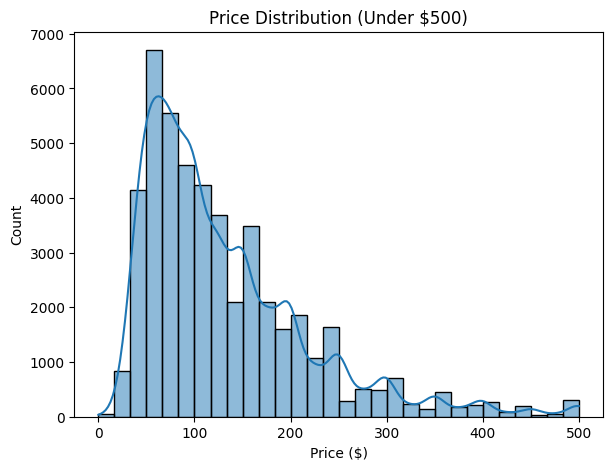

In [9]:

# Price distribution without outliers
plt.figure(figsize=(15, 5))

# Subplot 1: Histogram
plt.subplot(1, 2, 1)
price_filtered = df[df['price'] <= 500]  # Remove extreme outliers
sns.histplot(price_filtered['price'], bins=30, kde=True)
plt.title('Price Distribution (Under $500)')
plt.xlabel('Price ($)')


Location-wise Analysis

/tmp/ipython-input-3699234331.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='neighbourhood_group', data=df, palette='viridis')
/tmp/ipython-input-3699234331.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=borough_prices.index, y=borough_prices.values, palette='magma')


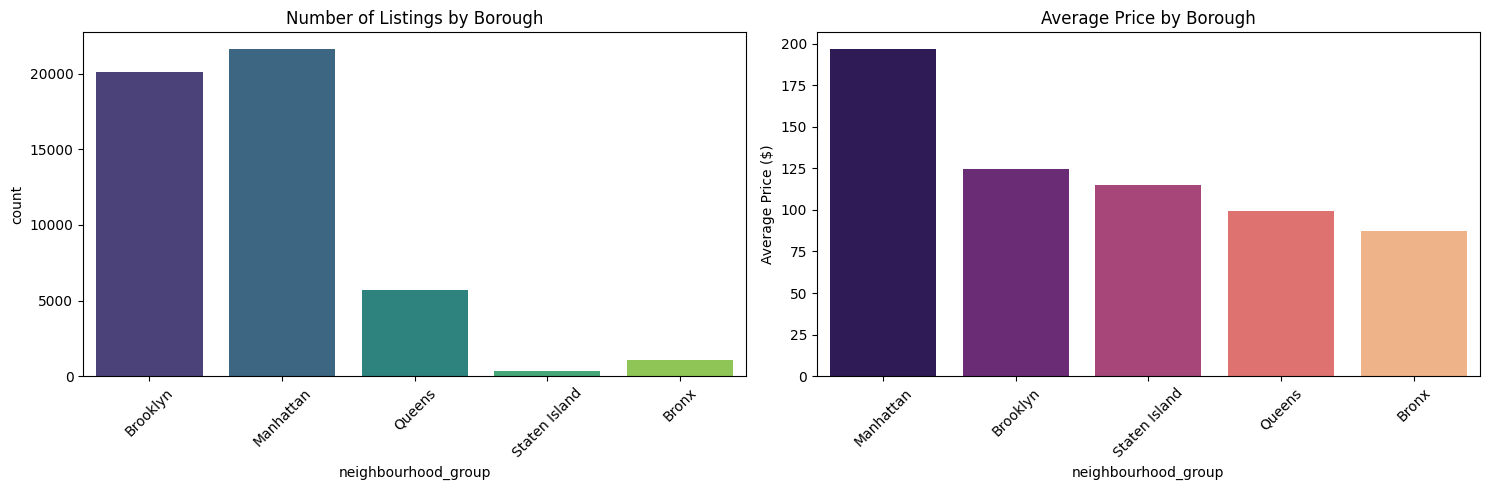

In [10]:
# Borough-wise analysis
plt.figure(figsize=(15, 5))

# Subplot 1: Listings count by borough
plt.subplot(1, 2, 1)
sns.countplot(x='neighbourhood_group', data=df, palette='viridis')
plt.title('Number of Listings by Borough')
plt.xticks(rotation=45)

# Subplot 2: Average price by borough
plt.subplot(1, 2, 2)
borough_prices = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
sns.barplot(x=borough_prices.index, y=borough_prices.values, palette='magma')
plt.title('Average Price by Borough')
plt.xticks(rotation=45)
plt.ylabel('Average Price ($)')
plt.tight_layout()
plt.show()

 Room type analysis


/tmp/ipython-input-4188334002.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=roomtype_prices.index, y=roomtype_prices.values, palette='coolwarm')


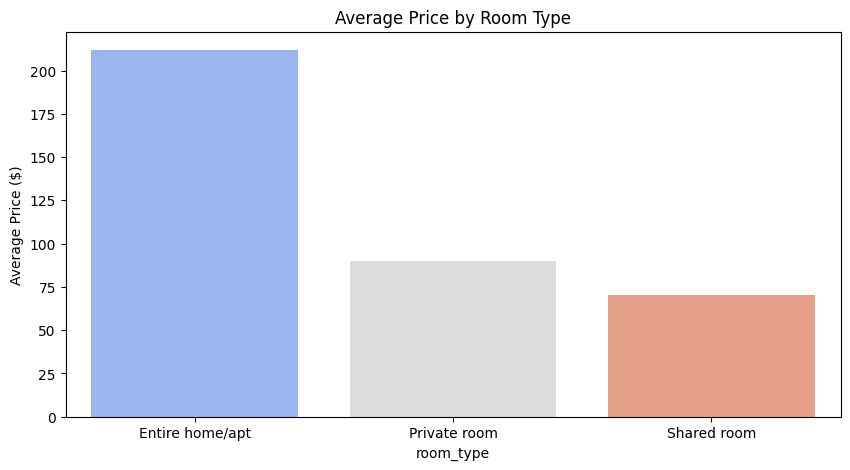

In [16]:
# Room type comparison
plt.figure(figsize=(10, 5))
roomtype_prices = df.groupby('room_type')['price'].mean().sort_values(ascending=False)
sns.barplot(x=roomtype_prices.index, y=roomtype_prices.values, palette='coolwarm')
plt.title('Average Price by Room Type')
plt.ylabel('Average Price ($)')
plt.show()

 Advanced Analysis (Relationships Explore )
Correlation Analysis

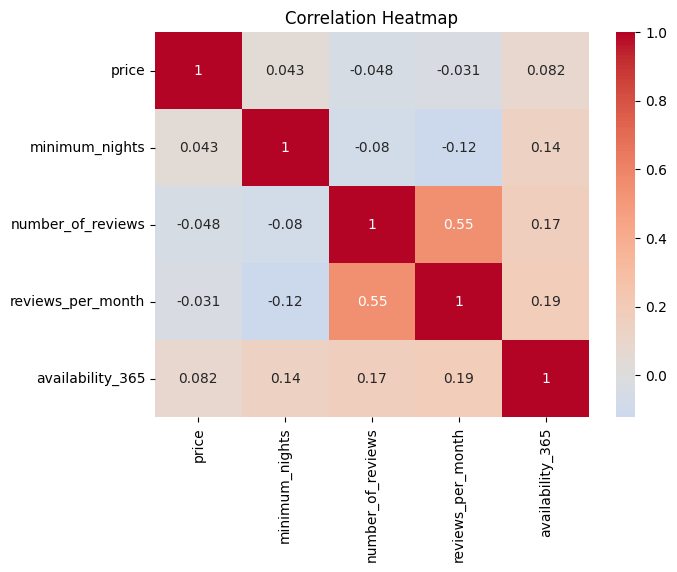

In [13]:
# Correlation heatmap
plt.figure(figsize=(7, 5))
correlation_matrix = df[['price', 'minimum_nights', 'number_of_reviews',
                        'reviews_per_month', 'availability_365']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [14]:
# Top 5 insights
print("=== TOP 5 INSIGHTS ===")
print(f"1. Most expensive borough: {df.groupby('neighbourhood_group')['price'].mean().idxmax()}")
print(f"2. Most common room type: {df['room_type'].value_counts().idxmax()}")
print(f"3. Borough with most listings: {df['neighbourhood_group'].value_counts().idxmax()}")
print(f"4. Percentage of entire homes: {df['room_type'].value_counts()['Entire home/apt']/len(df)*100:.1f}%")
print(f"5. Average availability: {df['availability_365'].mean():.0f} days per year")

=== TOP 5 INSIGHTS ===
1. Most expensive borough: Manhattan
2. Most common room type: Entire home/apt
3. Borough with most listings: Manhattan
4. Percentage of entire homes: 52.0%
5. Average availability: 113 days per year


step 8: Report

In [17]:
# FINAL SUMMARY REPORT
print("="*50)
print("AIRBNB NYC - EDA SUMMARY REPORT")
print("="*50)
print(f"Total Listings Analyzed: {len(df):,}")
print(f"Time Period: 2019")
print("\nKEY FINDINGS:")
print(" Manhattan has the highest average price")
print(" Entire homes are the most common room type")
print(" Brooklyn has the most number of listings")
print(" Price range: Mostly $50-$200 per night")
print(" Most listings available 100-200 days per year")
print("="*50)

AIRBNB NYC - EDA SUMMARY REPORT
Total Listings Analyzed: 48,874
Time Period: 2019

KEY FINDINGS:
 Manhattan has the highest average price
 Entire homes are the most common room type
 Brooklyn has the most number of listings
 Price range: Mostly $50-$200 per night
 Most listings available 100-200 days per year
